In [22]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries

In [30]:
# Example matrix
# a = np.array([[126, 78], [128, 80], [128, 82], [130, 82], [130, 84],  [132, 86]], dtype=np.int32)
a = np.array([[0.4489, 0.2304, 0.2162, 0],[0.2304, 0.2518, 0.2399, 0], [0.2162, 0.2399, 0.2993, 0], [0, 0, 0, 0]])
display(a)

array([[0.4489, 0.2304, 0.2162, 0.    ],
       [0.2304, 0.2518, 0.2399, 0.    ],
       [0.2162, 0.2399, 0.2993, 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

In [31]:
#Let's create a function to do this for us:
class new_PCA:
    def __init__(self, matrix):
        self.matrix = matrix
        self.centered = self.center_matrix(matrix)
        self.covariance = np.cov(self.centered, rowvar=False)
        self.eigen = np.linalg.eig(self.covariance)
        self.eigenvalues, self.eigenvectors = self.organizer(self.eigen)
        self.projection = self.PCA(self.centered, self.eigenvectors)
    
    def center_matrix(self, matrix):
        return matrix - matrix.mean(axis=0)

    
    def organizer(self, eigen):
        index_list = np.flip(np.argsort(eigen[0]))
        newvectors = np.empty((0,len(eigen[0])))
        eigen_vectors = eigen[1].transpose()
        for i in index_list:
            newvectors = np.append(newvectors, [eigen_vectors[i]], axis=0)
        return np.flip(np.sort(eigen[0])), newvectors.transpose()
    
    
    def PCA(self, centered, eigenvectors):
        return centered.dot(eigenvectors)

eigenvectors:
 [[ 0.72619265  0.67731038  0.11787656  0.        ]
 [ 0.48323884 -0.38092657 -0.78827354  0.        ]
 [ 0.48900355 -0.62940098  0.60392875  0.        ]
 [ 0.          0.          0.          1.        ]]
eigenvalues:
 [0.0558312  0.00909384 0.00032753 0.        ]
Principal transformation:
 [[ 0.20088728  0.11619894  0.00372748  0.        ]
 [ 0.06414489 -0.05486201 -0.02458449  0.        ]
 [ 0.07712922 -0.09733321  0.01899549  0.        ]
 [-0.34216139  0.03599628  0.00186152  0.        ]]


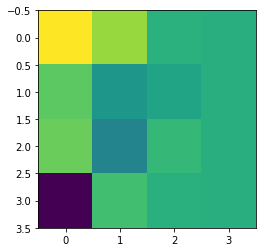

In [34]:
pca_matrix = new_PCA(a)
pca_matrix.projection
print("eigenvectors:\n", pca_matrix.eigenvectors)
print("eigenvalues:\n", pca_matrix.eigenvalues)
print("Principal transformation:\n", pca_matrix.projection)
plt.imshow(pca_matrix.projection)
plt.show()


eigenvectors:
 [[-0.72619265 -0.48323884 -0.48900355 -0.        ]
 [ 0.67731038 -0.38092657 -0.62940098  0.        ]
 [-0.11787656  0.78827354 -0.60392875 -0.        ]
 [ 0.          0.          0.          1.        ]]
eigenvalues:
 [0.0558312  0.00909384 0.00032753 0.        ]
Principal transformation:
 [[-0.20088728  0.11619894 -0.00372748  0.        ]
 [-0.06414489 -0.05486201  0.02458449  0.        ]
 [-0.07712922 -0.09733321 -0.01899549  0.        ]
 [ 0.34216139  0.03599628 -0.00186152  0.        ]]


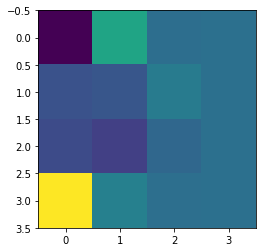

In [36]:
# PCA Ready module. We'll use as benchmark.
oldPCA = PCA()
oldPCA.fit(a)
print("eigenvectors:\n", oldPCA.components_)
print("eigenvalues:\n", oldPCA.explained_variance_)
print("Principal transformation:\n", oldPCA.transform(a))
plt.imshow(oldPCA.transform(a))
plt.show()

array([[3087,  906],
       [1405,   58]])

array([[ 841.,  424.],
       [-841., -424.]])

array([[ 9.41837035e+02, -8.88178420e-16],
       [-9.41837035e+02,  8.88178420e-16]])

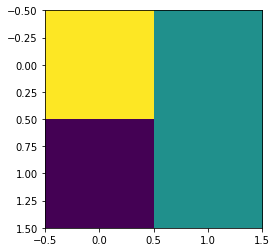

In [33]:
e = np.array([[3087, 906], [1405, 58]])
display(e)
e_PCA = new_PCA(e)
display(e_PCA.centered)
display(e_PCA.projection)
plt.imshow(e_PCA.projection)